x0: 1.0
y0: 1.0


/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_45702/3592146950.py:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dY, levels=[0], colors="red", label='y-nullcline')
/var/folders/4g/bbm0gjv155936xsdg_41_4080000gn/T/ipykernel_45702/3592146950.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dX, levels=[0], colors="blue", label='x-nullcline')
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36556 (\N{CJK 

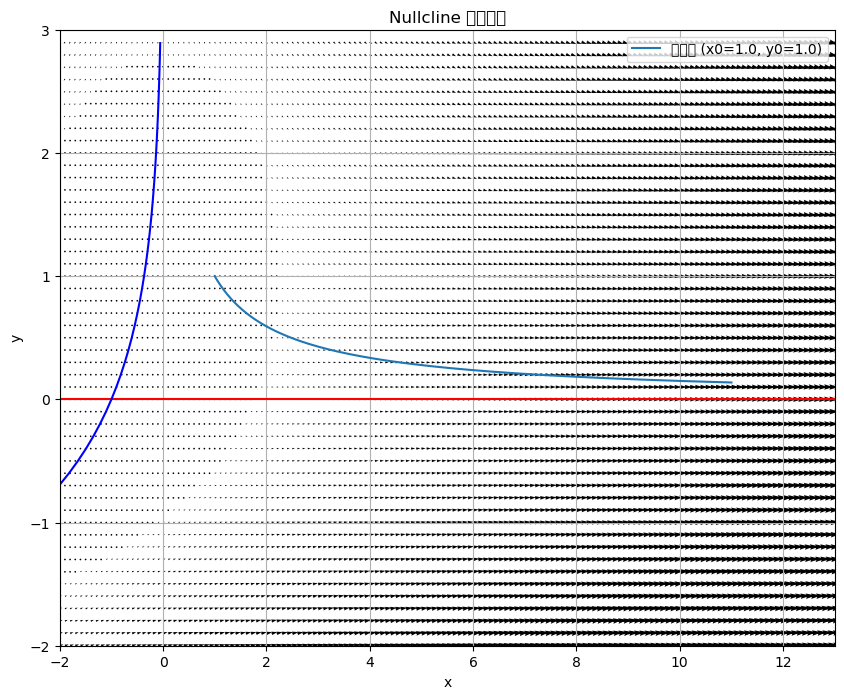

In [15]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

def dx(x, y, a=0, b=0):
    return x + np.exp(-y)

def dy(x, y, c=0, d=0):
    return -y

def vector(state, t):
    x, y = state
    nextx = dx(x,y)
    nexty = dy(y)
    return nextx, nexty

def plot_trajectory(x0, y0):
    t = np.arange(0.0, 2.0, 0.01)
    v = integrate.odeint(vector, [x0, y0], t)
    x_vec = v[:,0] 
    y_vec = v[:,1]
    
    plt.figure(figsize=(10, 8))
    plt.plot(x_vec, y_vec, label=f'初期値 (x0={x0}, y0={y0})')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Nullcline と解軌道")

    #作図範囲を設定するパラメータ
    p = 2.0
    xmax, xmin = max(x_vec.max() + p, 2), min(x_vec.min() - p, -2)
    ymax, ymin = max(y_vec.max() + p, 2), min(y_vec.min() - p, -2)

    X, Y = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))
    dX = dx(X, Y)
    dY = dy(Y)
    plt.quiver(X, Y, dX, dY)

    plt.contour(X, Y, dY, levels=[0], colors="red", label='y-nullcline')
    plt.contour(X, Y, dX, levels=[0], colors="blue", label='x-nullcline')
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.grid()
    plt.legend()
    plt.show()

# 初期値を入力
x0 = float(input("x0の値を入力してください: "))
y0 = float(input("y0の値を入力してください: "))

# 解軌道を表示
print(f'x0: {x0}')
print(f'y0: {y0}')
plot_trajectory(x0, y0)